In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Spring Problem

From the equation `x'' = -k/m*x`; `x' = -Awcos(wt)` and `x(0) = x0`

In [2]:
def spring(t,curr):
    x, v = curr
    return v, -k/m*x

k=0.1
m=5
x0 = 10
v0 = 0

initv = [x0,v0]
sol = solve_ivp(spring, [0, 100], initv)

$$ x_1 = x $$

$$ x_2 = x' $$



$$ x_1' = x_2 $$
$$ x_2' = -{k \over m}x $$

x0= 10 v0= 0


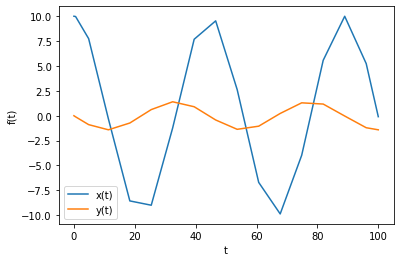

In [3]:
plt.plot(sol.t,sol.y[0], label='x(t)')
plt.plot(sol.t,sol.y[1], label='y(t)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
print('x0=',x0,'v0=',v0)

That is with condition:
- x0 = 10
- v0 = 0

## With different speed

Testing with every spring starts at `x0 = 0` but *"pushing"* the mass with different initial speed v0

x0= 0 v0= 10


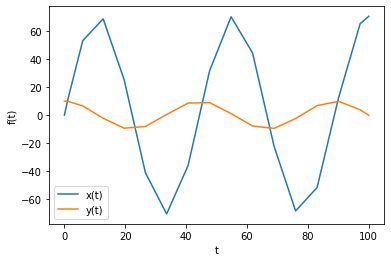

In [4]:
k=0.1
m=5
x0 = 0
v0 = 10

initv = [x0,v0]
sol = solve_ivp(spring, [0, 100], initv)

plt.plot(sol.t,sol.y[0], label='x(t)')
plt.plot(sol.t,sol.y[1], label='y(t)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
print('x0=',x0,'v0=',v0)

x0= 0 v0= 50


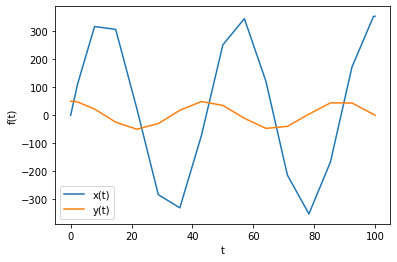

In [5]:
k=0.1
m=5
x0 = 0
v0 = 50

initv = [x0,v0]
sol = solve_ivp(spring, [0, 100], initv)

plt.plot(sol.t,sol.y[0], label='x(t)')
plt.plot(sol.t,sol.y[1], label='y(t)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
print('x0=',x0,'v0=',v0)

x0= 0 v0= 2


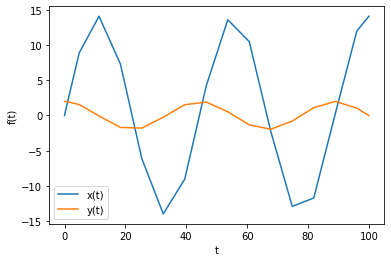

In [6]:
k=0.1
m=5
x0 = 0
v0 = 2

initv = [x0,v0]
sol = solve_ivp(spring, [0, 100], initv)

plt.plot(sol.t,sol.y[0], label='x(t)')
plt.plot(sol.t,sol.y[1], label='y(t)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
print('x0=',x0,'v0=',v0)

All looks the same, with the only difference is its amplitude for both `x(t)` and `v(t)` function.

## Different algorithm

With the same conditions, we'll vary the algorithm the `solve_ivp` function is using.

In [15]:
k=0.1
m=5
x0 = 5
v0 = 0

Solving as usual but with all the algorithms tried on

In [22]:
# Solving solution with
dt = 0.1
time = np.arange(0,100,dt)
w=(k/m)**0.5
A=5
x=A*np.cos(w*time)
v=-A*w*np.sin(w*time)

In [12]:
initv = [x0,v0]
sol1 = solve_ivp(spring, [0, 100], initv, method='RK45')
sol2 = solve_ivp(spring, [0, 100], initv, method='RK23')
sol3 = solve_ivp(spring, [0, 100], initv, method='Radau')
sol4 = solve_ivp(spring, [0, 100], initv, method='BDF')
sol5 = solve_ivp(spring, [0, 100], initv, method='LSODA')

x0= 5 v0= 0


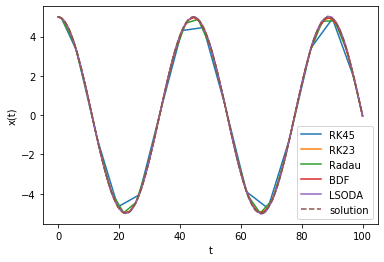

In [19]:
plt.plot(sol1.t,sol1.y[0], label='RK45')
plt.plot(sol2.t,sol2.y[0], label='RK23')
plt.plot(sol3.t,sol3.y[0], label='Radau')
plt.plot(sol4.t,sol4.y[0], label='BDF')
plt.plot(sol5.t,sol5.y[0], label='LSODA')
plt.plot(time, x, '--', label='solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
print('x0=',x0,'v0=',v0)

They do look different **a bit** but not too much.

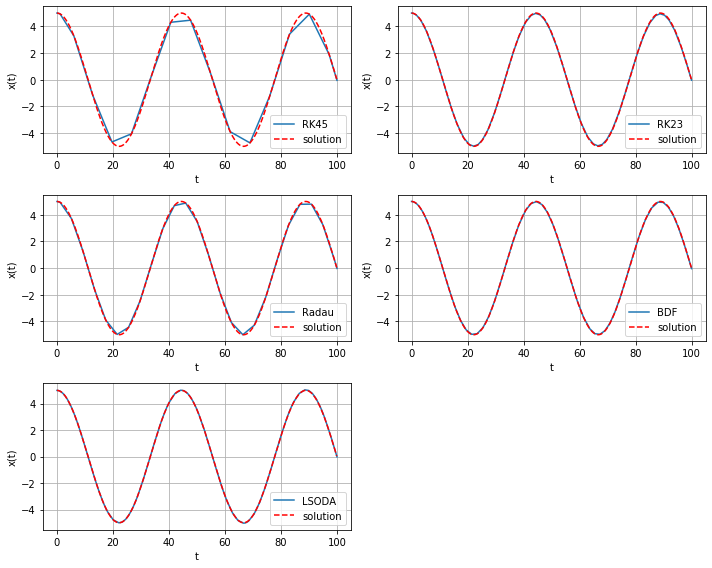

In [21]:
f = plt.figure(figsize=(10,8))
f.add_subplot(3,2,1)
plt.plot(sol1.t,sol1.y[0], label='RK45')
plt.plot(time, x, 'r--', label='solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend()
f.add_subplot(3,2,2)
plt.plot(sol2.t,sol2.y[0], label='RK23')
plt.plot(time, x, 'r--', label='solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend()
f.add_subplot(3,2,3)
plt.plot(sol3.t,sol3.y[0], label='Radau')
plt.plot(time, x, 'r--', label='solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend()
f.add_subplot(3,2,4)
plt.plot(sol4.t,sol4.y[0], label='BDF')
plt.plot(time, x, 'r--', label='solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend()
f.add_subplot(3,2,5)
plt.plot(sol5.t,sol5.y[0], label='LSODA')
plt.plot(time, x, 'r--', label='solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend()

plt.tight_layout()

Each one looks a bit different

# Pendulum

From the equation `theta'' = -g/L*sin(theta)`; `theta' = -thetamax*sqrt(g/L)cos(sqrt(g/L)*t)` and `theta(t) = thetamax`

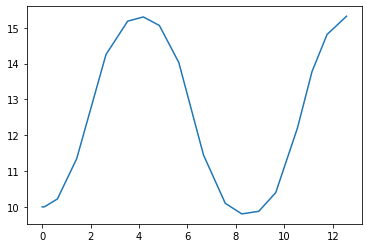

In [12]:
def f(t,current):
    theta,v=current
    return v,-g/L*np.sin(theta)


g=9.8
L=5
init_theta = 10
v0 = 0

init = [init_theta, v0]
sol = solve_ivp(f, [0, 4*np.pi], init)

plt.plot(sol.t,sol.y[0])